In [32]:
import tensorflow as tf

In [33]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.reuters.load_data(num_words=10000)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


((8982,), (8982,), (2246,), (2246,))

In [34]:
print(y_train[50], x_train[50])

4 [1, 1479, 1197, 71, 8, 25, 1479, 1197, 640, 71, 304, 471, 80, 9, 1379, 1901, 4530, 6797, 79, 5, 8144, 71, 175, 80, 58, 4, 1279, 5, 63, 32, 20, 5, 4, 326, 175, 80, 335, 7, 10, 845, 31, 4, 221, 9, 108, 259, 1479, 1197, 640, 8, 16, 600, 69, 68, 11, 15, 6, 8144, 21, 397, 321, 6, 438, 1761, 3072, 79, 5, 8144, 1040, 894, 1051, 617, 80, 4, 617, 80, 23, 1051, 172, 3814, 3206, 8144, 175, 79, 9, 1379, 6, 264, 395, 3814, 3206, 79, 1479, 1197, 9, 25, 323, 8, 4, 8144, 80, 23, 381, 43, 42, 205, 50, 77, 33, 909, 9, 3509, 22, 216, 6, 216, 17, 12]


In [35]:
len(x_train[50]), len(x_train[400]), len(x_train[200])

(118, 90, 212)

In [36]:
pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
len(pad_x_train[50])

500

In [37]:
import numpy as np

In [38]:
np.unique(y_train).shape, np.unique(y_train)

((46,),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]))

# make model

In [39]:
model = tf.keras.models.Sequential()

In [40]:
model.add(tf.keras.layers.Embedding(input_dim = 10000, output_dim = 24, input_length = 500)) # input layer
model.add(tf.keras.layers.LSTM(24, return_sequences=True, activation='tanh'))
model.add(tf.keras.layers.LSTM(12, activation='tanh'))
# model.add(tf.keras.layers.Flatten())       # hidden layer
model.add(tf.keras.layers.Dense(46, activation='softmax'))       # output layer

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc']) # gadget

In [41]:
# hist = model.fit(pad_x_train, y_train, epochs=5, validation_split=0.3, batch_size=128)
hist = model.fit(pad_x_train, y_train, epochs=100, validation_split=0.3, batch_size=256)

Epoch 1/100
25/25 [==============================] - 23s 765ms/step - loss: 3.7162 - acc: 0.2941 - val_loss: 3.4252 - val_acc: 0.3532
Epoch 2/100
25/25 [==============================] - 18s 735ms/step - loss: 3.2217 - acc: 0.3510 - val_loss: 2.9977 - val_acc: 0.3532
Epoch 3/100
25/25 [==============================] - 19s 750ms/step - loss: 2.8443 - acc: 0.3510 - val_loss: 2.6756 - val_acc: 0.3532
Epoch 4/100
25/25 [==============================] - 19s 750ms/step - loss: 2.6061 - acc: 0.3510 - val_loss: 2.5135 - val_acc: 0.3532
Epoch 5/100
25/25 [==============================] - 19s 747ms/step - loss: 2.5009 - acc: 0.3510 - val_loss: 2.4469 - val_acc: 0.3532
Epoch 6/100
25/25 [==============================] - 19s 747ms/step - loss: 2.4585 - acc: 0.3510 - val_loss: 2.4190 - val_acc: 0.3532
Epoch 7/100
25/25 [==============================] - 18s 740ms/step - loss: 2.4396 - acc: 0.3510 - val_loss: 2.4052 - val_acc: 0.3532
Epoch 8/100
25/25 [==============================] - 18s 734ms

# Evaluation

In [42]:
# 학습 시켰던 데이터
model.evaluate(pad_x_train, y_train)  # epoches: 5, batch_zise: 128 --> loss: 2.4052 (loss율이 너무 높음, 0으로 근접해야 함) - acc: 0.3517


281/281 [==============================] - 19s 68ms/step - loss: 1.2819 - acc: 0.6582


[1.2818572521209717, 0.6582052707672119]

In [ ]:
# # x_test 데이터 전처리
# # pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
# pad_x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=500)

In [44]:
# 데이터 전처리 function 만들기
def pad_make(x_data):
  pad_x = tf.keras.preprocessing.sequence.pad_sequences(x_data, maxlen=500)
  return pad_x

In [45]:
pad_make_x = pad_make(x_test)

In [46]:
model.evaluate(pad_make_x, y_test)

71/71 [==============================] - 5s 66ms/step - loss: 2.0218 - acc: 0.5392


[2.021793842315674, 0.5391807556152344]

In [47]:
# 학습 시키지 않은 데이터
# model.evaluate(pad_x_test, y_test)    # loss: 2.4171 - acc: 0.3620 (학습시킨 데이터에 비해서 loss율이 높음 -> 모델 학습이 잘됨)

71/71 [==============================] - 5s 66ms/step - loss: 2.0218 - acc: 0.5392


[2.021793842315674, 0.5391807556152344]

In [48]:
import matplotlib.pyplot as plt

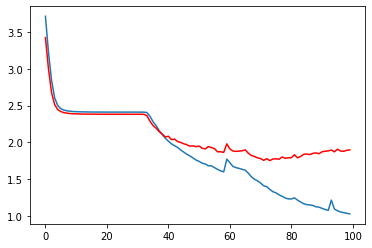

In [52]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], 'r-')
plt.show()

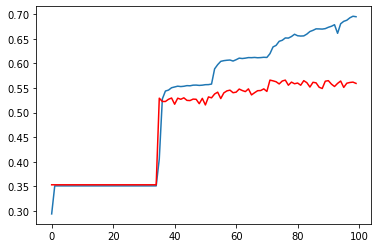

In [53]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'], 'r-')
plt.show()

In [54]:
from sklearn.metrics import classification_report

In [56]:
y_train_pred = model.predict(pad_x_train)
y_train_pred[0]

array([2.8431969e-04, 2.8446221e-03, 1.2605592e-04, 9.7697067e-01,
       3.9036120e-03, 1.0795376e-04, 3.5590667e-04, 2.2492159e-04,
       6.7690789e-04, 1.6174899e-04, 2.3051449e-04, 9.1942679e-04,
       2.3281039e-04, 2.7757903e-04, 1.0407576e-04, 3.7313552e-05,
       6.7755370e-04, 1.0166320e-04, 6.7270543e-05, 3.3784686e-03,
       2.9620249e-03, 8.8562694e-04, 8.3205123e-05, 1.2930568e-04,
       4.2267080e-04, 8.8672095e-04, 5.5959277e-05, 9.5958123e-05,
       1.8686191e-04, 1.1286732e-04, 3.2671544e-04, 1.9696502e-04,
       1.2298726e-04, 4.2536027e-05, 1.6286981e-04, 4.0699866e-05,
       1.9379082e-04, 7.5566182e-05, 1.0462948e-04, 1.6941111e-04,
       5.5976148e-04, 8.8051587e-05, 8.7815271e-05, 1.1613824e-04,
       1.5577144e-04, 5.1820796e-05], dtype=float32)

In [57]:
import numpy as np

In [61]:
y_pred = np.argmax(y_train_pred, axis=1)
y_pred.shape

(8982,)

In [63]:
len(y_train)

8982

In [65]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.38      0.03      0.06       432
           2       0.00      0.00      0.00        74
           3       0.95      0.95      0.95      3159
           4       0.93      0.91      0.92      1949
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00        48
           7       0.00      0.00      0.00        16
           8       0.12      0.61      0.20       139
           9       0.00      0.00      0.00       101
          10       0.00      0.00      0.00       124
          11       0.38      0.74      0.50       390
          12       0.00      0.00      0.00        49
          13       0.26      0.62      0.36       172
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        20
          16       0.42      0.23      0.30       444
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
y_test_pred = model.predict(pad_x_test)

In [67]:
y_pred = np.argmax(y_test_pred, axis=1)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.20      0.04      0.06       105
           2       0.00      0.00      0.00        20
           3       0.92      0.88      0.90       813
           4       0.86      0.71      0.78       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.07      0.32      0.11        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.22      0.43      0.29        83
          12       0.00      0.00      0.00        13
          13       0.06      0.19      0.09        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.15      0.17      0.16        99
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
